<a href="https://colab.research.google.com/github/sruthivellore/HCR-Using-ANN/blob/main/HCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Initialize**

In [2]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

**Input Preprocessing**

In [3]:
def getLetters(img):
    height = img.shape[0]
    width = img.shape[1]
    print("\n Resizing Image........")
    img = cv2.resize(img,dsize =(1020, int(1020*height/width)), interpolation = cv2.INTER_AREA)
    height = img.shape[0]
    width = img.shape[1]
    # src_img = cv2.resize(copy, )
    print("#---------Image Info:--------#")
    print("\tHeight =",height,"\n\tWidth =",width)
    print("#----------------------------#")
    #converting the image from color to gray scale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2_imshow(gray)
  
    #noice removal using gaussian blur
    print("Noise Removal From Image.........")
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    print("Applying Threshold ..............")
    #finding the contours and drawing contours
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    # ret, thresh2 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV)
    # cv2_imshow(thresh)
    img_erode = cv2.erode(thresh, np.ones((2, 2), np.uint8), iterations=1)
    # cv2_imshow(img_erode)
    print("Beginning Character Semenation..............")
    contours, hierarchy = cv2.findContours(img_erode, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    output = img.copy()
    letters = []
    for idx, contour in enumerate(contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        print("R", idx, x, y, w, h, cv2.contourArea(contour), hierarchy[0][idx])

        if hierarchy[0][idx][3] == 0:
            cv2.rectangle(output, (x, y), (x + w, y + h), (70, 0, 0), 1)
            letter_crop = thresh[y:y + h, x:x + w]
                # print(letter_crop.shape)
                # Resize letter canvas to square
            size_max = max(w, h)
            letter_square = 255 * np.ones(shape=[size_max, size_max], dtype=np.uint8)
            if w > h:
                # Enlarge image top-bottom
                y_pos = size_max//2 - h//2
                letter_square[y_pos:y_pos + h, 0:w] = letter_crop
            elif w < h:
                # Enlarge image left-right
                x_pos = size_max//2 - w//2
                letter_square[0:h, x_pos:x_pos + w] = letter_crop
            else:
                letter_square = letter_crop
            # cv2_imshow(letter_square)
            # Resize letter to 28x28 and add letter and its X-coordinate
            letters.append((x, w, cv2.resize(letter_square, (28, 28), interpolation=cv2.INTER_AREA)))
    letters.sort(key=lambda x: x[0], reverse=False)
    # img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
    # cv2_imshow(img)
    # cv2_imshow(output)
    print(len(letters))
    for i in letters:
      cv2_imshow(i[2])
      print(i[2].shape)
    return letters




In [4]:
import cv2 
def getTextImageData(img):
    print("\n........Program Initiated.......\n") 
    # Preprocessing the image starts 
    height = img.shape[0]
    width = img.shape[1]
    img = cv2.resize(img,dsize =(1220, int(1220*height/width)), interpolation = cv2.INTER_AREA)
    height = img.shape[0]
    width = img.shape[1]
      
    # Convert the image to gray scale 
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    # cv2_imshow(gray)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    gray = cv2.GaussianBlur(gray, (5, 5), 0)
    # cv2_imshow(gray)  
    # Performing OTSU threshold 
    ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
    # cv2_imshow(thresh1)
    # Specify structure shape and kernel size.  
    # Kernel size increases or decreases the area of the rectangle to be detected. 
    rect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (18, 18)) 
      
    # Appplying dilation on the threshold image 
    dilation = cv2.dilate(thresh1, rect_kernel, iterations = 5)#5 
    cv2_imshow(dilation)  
    # Finding contours 
    contours, hierarchy = cv2.findContours(dilation, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
      
    # Creating a copy of image 
    im2 = img.copy() 
    print("Beginning Sentence Semenation..............")
      
    # Looping through the identified contours 
    # Then rectangular part is cropped and passed to get letters from this line 
    lines = []
    for cnt in contours: 
        x, y, w, h = cv2.boundingRect(cnt) 
          
        # Drawing a rectangle on copied image 
        rect = cv2.rectangle(im2, (x, y), (x + w, y + h), (0, 255, 0), 2) 
          
        # Cropping the text block for giving input to OCR 
        cropped = im2[y:y + h, x:x + w] 
        lines.append((x, w,cropped))
    # cv2_imshow(im2)
    text = []

    for i in lines:
      # cv2_imshow(i[2])
      temp = getLetters(i[2])
      text.append(temp)
    return text



........Program Initiated.......



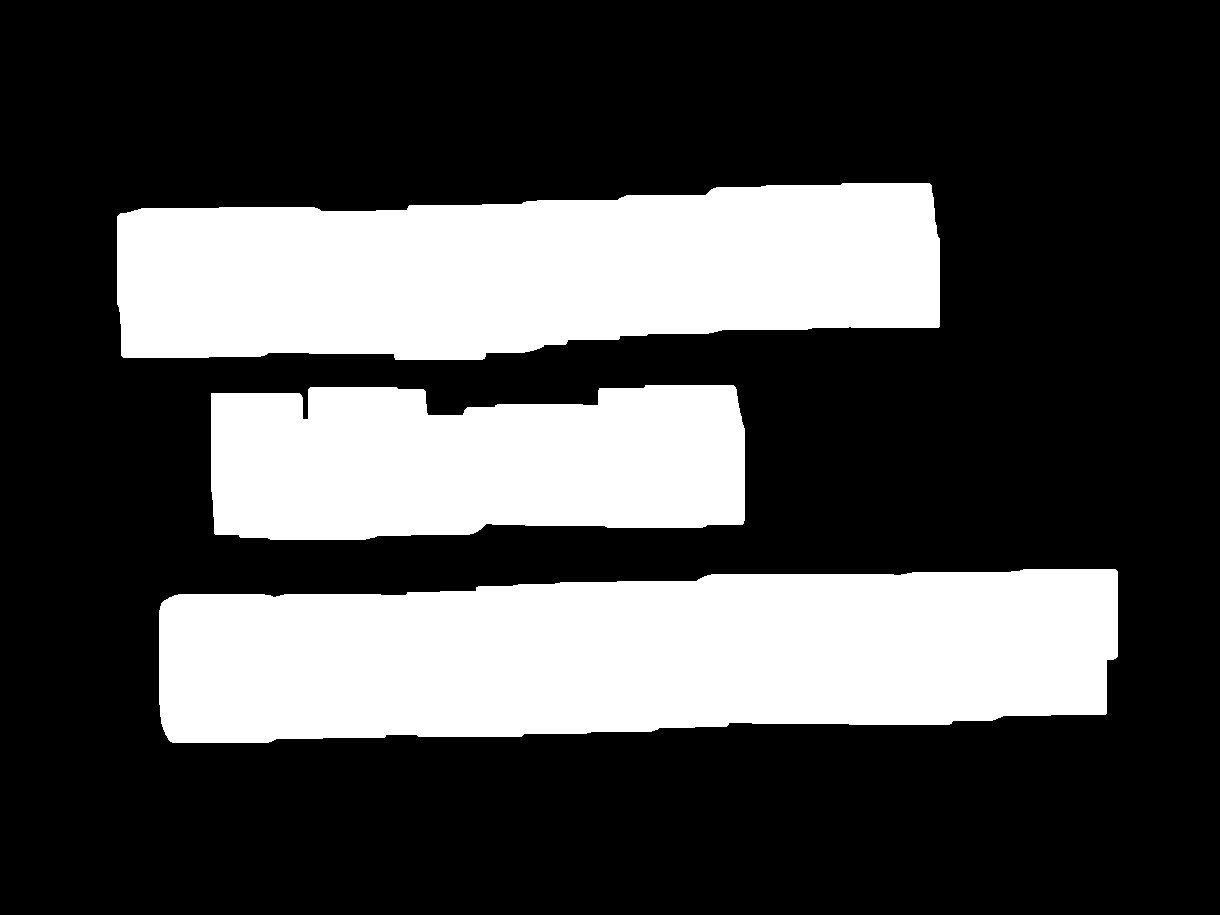

Beginning Sentence Semenation..............

 Resizing Image........
#---------Image Info:--------#
	Height = 185 
	Width = 1020
#----------------------------#
Noise Removal From Image.........
Applying Threshold ..............
Beginning Character Semenation..............
R 0 3 3 1017 182 183885.5 [-1 -1  1 -1]
R 1 103 71 41 64 1054.5 [ 2 -1 -1  0]
R 2 42 69 52 70 2868.0 [4 1 3 0]
R 3 51 79 35 52 1360.0 [-1 -1 -1  2]
R 4 152 68 44 66 1690.5 [6 2 5 0]
R 5 166 76 22 23 326.0 [-1 -1 -1  4]
R 6 259 66 67 67 1571.5 [ 7  4 -1  0]
R 7 334 65 45 67 1172.0 [ 8  6 -1  0]
R 8 379 58 53 71 1182.5 [ 9  7 -1  0]
R 9 455 55 44 73 2545.0 [11  8 10  0]
R 10 463 63 28 57 1216.0 [-1 -1 -1  9]
R 11 512 54 48 69 1952.0 [13  9 12  0]
R 12 522 63 25 29 525.5 [-1 -1 -1 11]
R 13 664 49 46 70 1753.0 [15 11 14  0]
R 14 676 57 21 27 371.5 [-1 -1 -1 13]
R 15 761 48 45 72 1104.5 [16 13 -1  0]
R 16 716 47 40 70 2116.5 [18 15 17  0]
R 17 725 55 24 53 938.0 [-1 -1 -1 16]
R 18 613 47 49 70 1634.0 [20 16 19  0]
R 19 634

(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)

 Resizing Image........
#---------Image Info:--------#
	Height = 296 
	Width = 1020
#----------------------------#
Noise Removal From Image.........
Applying Threshold ..............
Beginning Character Semenation..............
R 0 5 5 1013 289 291454.0 [-1 -1  1 -1]
R 1 178 145 62 66 2005.5 [ 3 -1  2  0]
R 2 200 159 21 8 93.5 [-1 -1 -1  1]
R 3 392 134 54 67 2581.5 [5 1 4 0]
R 4 402 151 33 39 794.5 [-1 -1 -1  3]
R 5 662 118 56 66 2815.5 [7 3 6 0]
R 6 673 131 35 42 985.0 [-1 -1 -1  5]
R 7 738 113 60 64 1414.5 [ 8  5 -1  0]
R 8 546 113 98 69 2723.0 [ 9  7 -1  0]
R 9 75 90 67 118 2414.5 [10  8 -1  0]
R 10 313 84 55 115 1451.5 [11  9 -1  0]
R 11 816 81 48 108 1382.0 [12 10 -1  0]
R 12 262 80 46 124 1502.5 [13 11 -1  0]
R 13 883 75 53 108 2670.5 [-1 12 14  0]
R 14 895 148 27 23 461.0 [-1 -1 -1 13]
10


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)

 Resizing Image........
#---------Image Info:--------#
	Height = 219 
	Width = 1020
#----------------------------#
Noise Removal From Image.........
Applying Threshold ..............
Beginning Character Semenation..............
R 0 4 4 1016 215 217202.5 [-1 -1  1 -1]
R 1 261 84 54 74 1212.0 [ 2 -1 -1  0]
R 2 103 82 45 79 2870.0 [4 1 3 0]
R 3 111 91 29 61 1307.5 [-1 -1 -1  2]
R 4 436 80 40 77 1335.5 [ 5  2 -1  0]
R 5 49 79 41 83 1172.5 [ 6  4 -1  0]
R 6 155 78 46 79 2123.5 [8 5 7 0]
R 7 166 87 27 28 499.5 [-1 -1 -1  6]
R 8 369 75 51 90 1274.0 [ 9  6 -1  0]
R 9 494 74 51 73 1425.5 [11  8 10  0]
R 10 507 95 14 19 133.0 [-1 -1 -1  9]
R 11 546 70 59 71 2055.5 [13  9 12  0]
R 12 563 79 27 22 354.0 [-1 -1 -1 11]
R 13 656 63 72 70 1605.0 [14 11 -1  0]
R 14 773 53 46 75 1245.0 [15 13 -1  0]
R 15 825 51 49 74 1254.0 [16 14 -1  0]
R 16 893 49 73 77 1836.0 [-1 15 -1  0]
12


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


(28, 28)


In [6]:
img = cv2.imread("/finalImage.jpg")

TextImageData = getTextImageData(img)


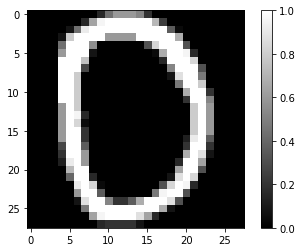

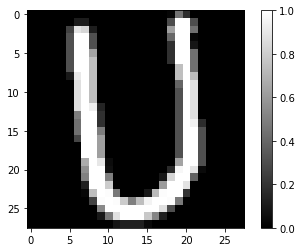

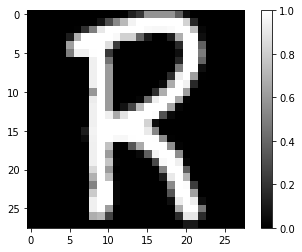

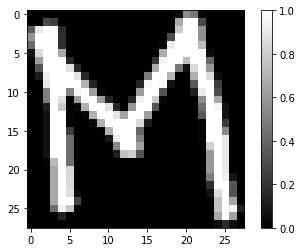

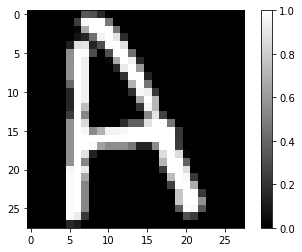

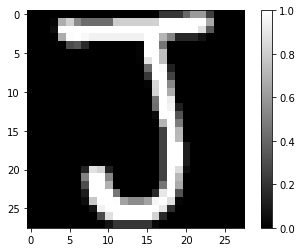

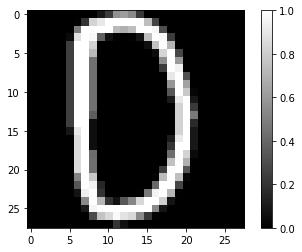

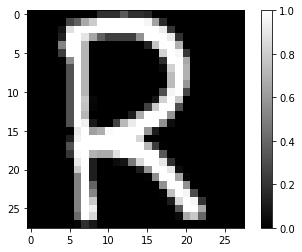

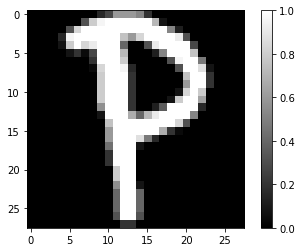

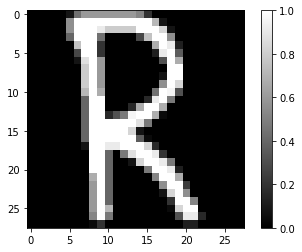

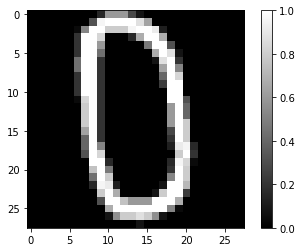

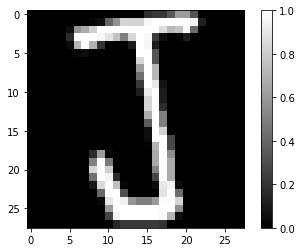

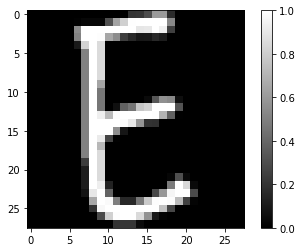

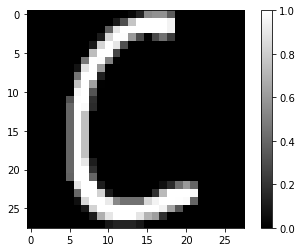

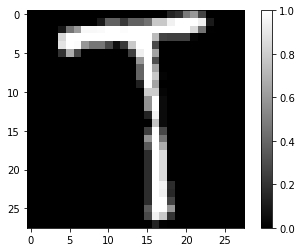

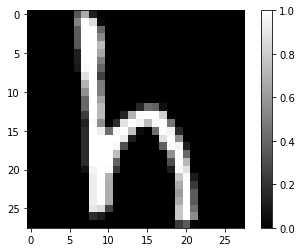

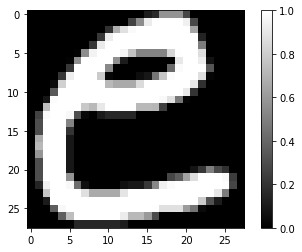

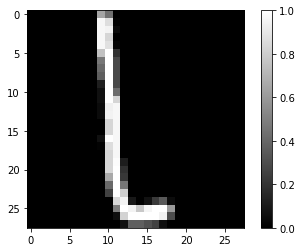

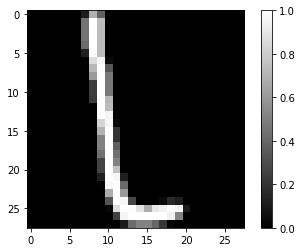

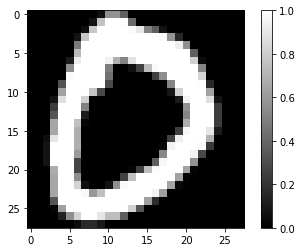

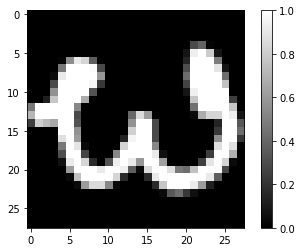

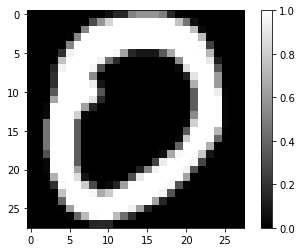

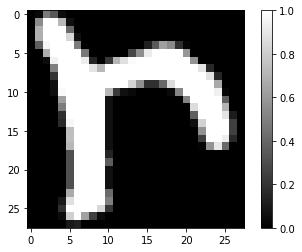

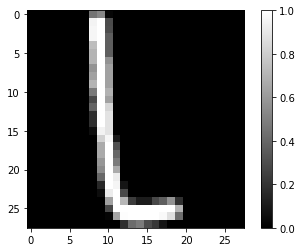

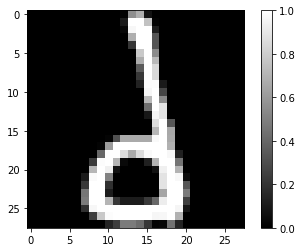

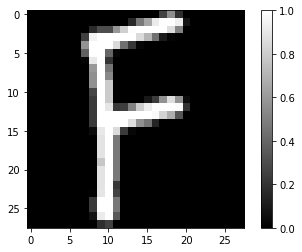

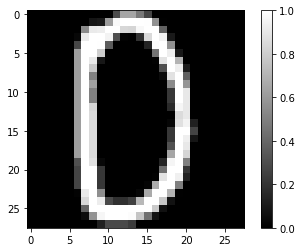

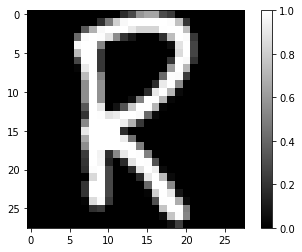

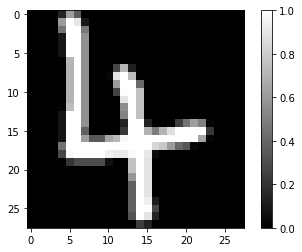

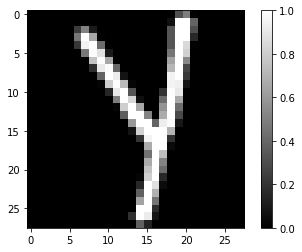

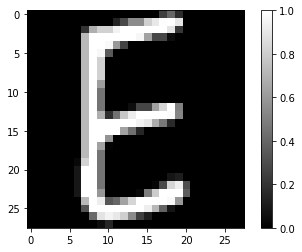

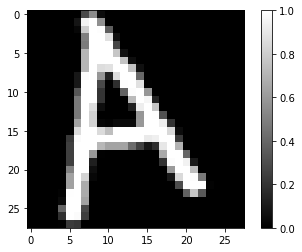

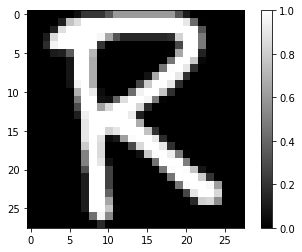

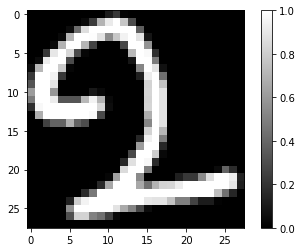

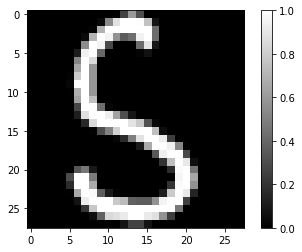

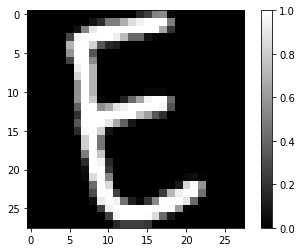

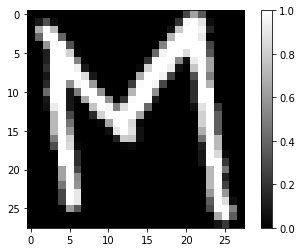

In [7]:
#Visualize data
# for i in text:
#   for j in i:
#     ret,thresh1 = cv2.threshold(j[2], 0, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV) 
#     plt.imshow(thresh1,cmap='gray')
#     plt.colorbar()
#     plt.show()
# print(TextImageData[0][2].shape)
for Lines in TextImageData:
  for c in Lines :
    img_arr = np.expand_dims(c[2], axis=0)
    img_arr = 1 - img_arr/255.0
    # img_arr = np.rot90(img_arr, 3)
    # img_arr = np.fliplr(img_arr)
    img_arr = img_arr.reshape((28,28))
    plt.imshow(img_arr,cmap='gray')
    plt.colorbar()
    plt.show()
    



**Downloading Dataset**

In [ ]:
import urllib.request
from urllib.request import urlretrieve
urllib.request.urlretrieve ("http://biometrics.nist.gov/cs_links/EMNIST/gzip.zip", "/content/data.zip")

('/content/data.zip', <http.client.HTTPMessage at 0x7f11b859c6a0>)

In [ ]:
#Unzip the Dataset
import zipfile
zip_ref = zipfile.ZipFile('/content/data.zip', 'r')
zip_ref.extractall('/content/data/')
zip_ref.close()


In [ ]:
#Unzip all the data sets
import struct
import gzip
def read_idx(filename):
  print('Processing data from ',filename)
  with gzip.open(filename,'rb') as f:
    z, dtype, dim = struct.unpack('>HBB',f.read(4))
    print("Dimention:",dim)
    shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dim)) 
    print("Shape:",shape)
    return np.frombuffer(f.read(),dtype=np.uint8).reshape(shape)


In [ ]:
#Loading Data
def load_eData():
  train_images = "/content/data/gzip/emnist-byclass-train-images-idx3-ubyte.gz"
  train_labels = "/content/data/gzip/emnist-byclass-train-labels-idx1-ubyte.gz"
  test_images = "/content/data/gzip/emnist-byclass-test-images-idx3-ubyte.gz"
  test_labels = "/content/data/gzip/emnist-byclass-test-labels-idx1-ubyte.gz"
  X_train = read_idx(train_images)
  Y_train = read_idx(train_labels)
  X_test = read_idx(test_images)
  Y_test = read_idx(test_labels)
  return(X_train, Y_train, X_test, Y_test)
X_train, y_train, X_test, y_test = load_eData()

Processing data from  /content/data/gzip/emnist-byclass-train-images-idx3-ubyte.gz
Dimention: 3
Shape: (697932, 28, 28)
Processing data from  /content/data/gzip/emnist-byclass-train-labels-idx1-ubyte.gz
Dimention: 1
Shape: (697932,)
Processing data from  /content/data/gzip/emnist-byclass-test-images-idx3-ubyte.gz
Dimention: 3
Shape: (116323, 28, 28)
Processing data from  /content/data/gzip/emnist-byclass-test-labels-idx1-ubyte.gz
Dimention: 1
Shape: (116323,)


**Mounting the Google Drive**

In [ ]:
# from google.colab import files
# uploaded = files.upload()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Loading the Trainning Data From Google Drive**

In [ ]:
#!pip install idx2numpy
# import idx2numpy
#  def load_emnist():
#   train_images = "/content/drive/My Drive/majorproject/DataSet/emnist-byclass-train-images-idx3-ubyte"
#   train_labels = "/content/drive/My Drive/majorproject/DataSet/emnist-byclass-train-labels-idx1-ubyte"
#   test_images = "/content/drive/My Drive/majorproject/DataSet/emnist-byclass-test-images-idx3-ubyte"
#   test_labels = "/content/drive/My Drive/majorproject/DataSet/emnist-byclass-test-labels-idx1-ubyte"

#   X_train = idx2numpy.convert_from_file(train_images)
#   Y_train = idx2numpy.convert_from_file(train_labels)
#   X_test = idx2numpy.convert_from_file(test_images)
#   Y_test = idx2numpy.convert_from_file(test_labels)
 
#   print(X_train.shape ,Y_train.shape,X_test.shape ,Y_test.shape)
#   return(X_train, Y_train, X_test, Y_test)

In [ ]:
# r_trainx,r_trainy,r_testx,r_testy = load_emnist();

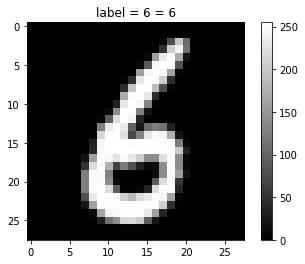

In [ ]:
#Visualize data
def visualize(x):
  labels ='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
  
  plt.imshow(X_train[x].T, cmap='gray')
  plt.title('label = %d = %s' % (y_train[x],labels[y_train[x]]))
  plt.colorbar()
  plt.show()
visualize(174)

**Prepare Data**

In [ ]:
# print('Raw Train X Shape :',r_trainx.shape,'\nRaw Train Y Shape :' ,r_trainy.shape,'\nRaw Test X Shape :' ,r_testx.shape ,'\nRaw Test Y Shape :' ,r_testy.shape)

In [ ]:
#Save the dimensions of the raw data
# img_height = len(r_trainx[0])
# img_width = len(r_trainx[1])
# input_shape =img_height*img_width
# print(img_height,img_width,input_shape)
# train_X = r_trainx.reshape(len(r_trainx), input_shape)
# test_X = r_testx.reshape(len(r_testx), input_shape)
# train_X = train_X.astype('float32')
# test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
# train_y = np_utils.to_categorical(r_trainy)
# test_y = np_utils.to_categorical(r_testy)

In [ ]:
#Flattning

X_train = X_train.reshape(len(X_train), 784)
X_test = X_test.reshape(len(X_test), 784)

print("Train X Shape :",X_train.shape,", Test X Shape:",X_test.shape)

Train X Shape : (697932, 784) , Test X Shape: (116323, 784)


Normalization

In [ ]:
#We turn it into float to acquire precision

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


print(X_test.dtype)

float32


In [ ]:
X_train/= 255
X_test /= 255


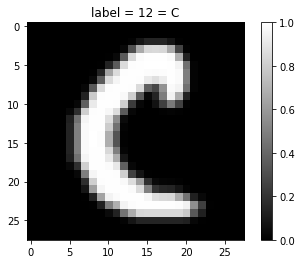

In [ ]:
#Visualize data
def visualize2(x):
  labels ='0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
  plt.imshow(X_train.reshape(len(X_train),28,28)[x].T, cmap='gray')
  plt.title('label = %d = %s' % (y_train[x],labels[y_train[x]]))
  plt.colorbar()
  plt.show()
visualize2(1995)

In [ ]:
Labels ='O123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
n_cat = len(Labels)


def one_hot_encoder(labels):
  n_labels = len(labels)
  n_unique_labels = 62
  one_hot_encoder = np.zeros((n_labels,n_unique_labels))
  one_hot_encoder[np.arange(n_labels),labels] = 1
  return(one_hot_encoder)
Y_train = one_hot_encoder(y_train)
Y_test = one_hot_encoder(y_test)


In [ ]:
print(y_train[1235],Y_train[1235],Labels[33],n_cat)

33 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] X 62


**Defining a Model**(Tensorflow)

In [ ]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
epochs_completed = 0
index_in_epoch = 0
num_examples = X_train.shape[0]
 # for splitting out batches of data
def next_batch(batch_size):

    global X_train
    global Y_train
    global index_in_epoch
    global epochs_completed

    start = index_in_epoch
    index_in_epoch += batch_size

    # when all trainig data have been already used, it is reorder randomly    
    if index_in_epoch > num_examples:
        # finished epoch
        epochs_completed += 1
        # shuffle the data
        perm = np.arange(num_examples)
        np.random.shuffle(perm)
        X_train = X_train[perm]
        Y_train = Y_train[perm]
        # start next epoch
        start = 0
        index_in_epoch = batch_size
        assert batch_size <= num_examples
    end = index_in_epoch
    return X_train[start:end], Y_train[start:end]

In [ ]:
# Python optimisation variables
learning_rate = 0.3
epochs = 10
batch_size = 400
tf.reset_default_graph()
# tf.compat.v1.reset_default_graph()
# declare the training data placeholders
# input x - for 28 x 28 pixels = 784
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 62
y = tf.placeholder(tf.float32, [None, 62])


W1 = tf.Variable(tf.random_normal([784, 512], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([512]), name='b1')

W2 = tf.Variable(tf.random_normal([512, 256], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([256]), name='b2')

W3 = tf.Variable(tf.random_normal([256, 128], stddev=0.03), name='W3')
b3 = tf.Variable(tf.random_normal([128]), name='b3')

W4 = tf.Variable(tf.random_normal([128, 62], stddev=0.03), name='W4')
b4 = tf.Variable(tf.random_normal([62]), name='b4')

hidden_out1 = tf.add(tf.matmul(x, W1), b1)
hidden_out1 = tf.nn.relu(hidden_out1)

hidden_out2 = tf.add(tf.matmul(hidden_out1, W2), b2)
hidden_out2 = tf.nn.relu(hidden_out2)

hidden_out3 = tf.add(tf.matmul(hidden_out2, W3), b3)
hidden_out3 = tf.nn.relu(hidden_out3)

y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out3, W4), b4))

y_clipped = tf.clip_by_value(y_, 1e-10, 0.9999999)
cross_entropy = -tf.reduce_mean(tf.reduce_sum(y * tf.log(y_clipped)
                         + (1 - y) * tf.log(1 - y_clipped), axis=1))

optimiser = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cross_entropy)

# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

# define an accuracy assessment operation
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

**Training and Saving a Model**

In [ ]:
# start the session
#tf.reset_default_graph()

accuracy_history = []

with tf.Session() as sess:
   # initialise the variables
   saver1 = tf.train.Saver()
   sess.run(init_op)
   total_batch = int(len(Y_train) / batch_size)
   for epoch in range(epochs):
        avg_cost = 0
        for i in range(total_batch):
          batch_x, batch_y =next_batch(batch_size)
          _, c = sess.run([optimiser, cross_entropy],feed_dict={x: batch_x, y: batch_y})
          avg_cost += c / total_batch
        correct_prediction1 = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
        accuracy1 = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
        accuracy1 = (sess.run(accuracy1, feed_dict={x:X_train, y : Y_train}))
        accuracy_history.append(accuracy1)
        print('Epoch : ', epoch+1," - Train Accuracy : ", accuracy1)
        print("Epoch:", (epoch + 1), "cost =", "{:.3f}".format(avg_cost))
   print("Test Accuracy : ",sess.run(accuracy, feed_dict={x: X_test, y:Y_test}))
   save_path = saver1.save(sess, "/content/model-4Layertest3/model10.ckpt")
   predictions = y_.eval(feed_dict = {x:X_test})
   output = np.zeros_like(predictions)
   output[np.arange(len(predictions)), predictions.argmax(1)] = 1
   print(classification_report(Y_test, output, target_names=target_names))


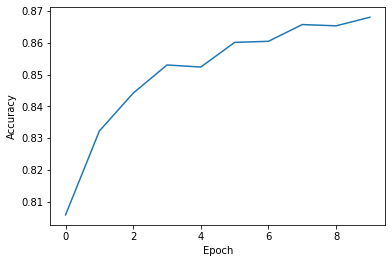

In [ ]:
plt.plot(accuracy_history)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
output = np.zeros_like(predictions)
output[np.arange(len(predictions)), predictions.argmax(1)] = 1
random_num = 345
ans = np.where(output[random_num] == 1)
print(max(predictions[random_num]),output[random_num],Y_test[random_num],Labels[ans[0][0]],Labels[y_test[random_num]])
plt.imshow(X_test.reshape(len(X_test),28,28)[random_num].T, cmap='gray')
plt.title('label = %d = (actual)%s = (predicted)%s' % (y_test[random_num],Labels[y_test[random_num]],Labels[ans[0][0]]))
plt.colorbar()
plt.show()


**Loading a Saved Model**

In [ ]:
from sklearn.metrics import classification_report

tf.reset_default_graph()
x = tf.placeholder(tf.float32, [None, 784])
# now declare the output data placeholder - 62
y = tf.placeholder(tf.float32, [None, 62])


W1 = tf.Variable(tf.random_normal([784, 512], stddev=0.03), name='W1')
b1 = tf.Variable(tf.random_normal([512]), name='b1')

W2 = tf.Variable(tf.random_normal([512, 256], stddev=0.03), name='W2')
b2 = tf.Variable(tf.random_normal([256]), name='b2')

W3 = tf.Variable(tf.random_normal([256, 128], stddev=0.03), name='W3')
b3 = tf.Variable(tf.random_normal([128]), name='b3')

W4 = tf.Variable(tf.random_normal([128, 62], stddev=0.03), name='W4')
b4 = tf.Variable(tf.random_normal([62]), name='b4')


hidden_out1 = tf.add(tf.matmul(x, W1), b1)
hidden_out1 = tf.nn.relu(hidden_out1)

hidden_out2 = tf.add(tf.matmul(hidden_out1, W2), b2)
hidden_out2 = tf.nn.relu(hidden_out2)

hidden_out3 = tf.add(tf.matmul(hidden_out2, W3), b3)
hidden_out3 = tf.nn.relu(hidden_out3)

y_ = tf.nn.softmax(tf.add(tf.matmul(hidden_out3, W4), b4))

# from tensorflow.python.layers import base
# import tensorflow.contrib.slim as slim

# def model_summary():
#     model_vars = tf.trainable_variables()
#     slim.model_analyzer.analyze_vars(model_vars, print_info=True)

# model_summary()


In [ ]:
saver2 = tf.train.Saver()
# l = "O123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
# target_names = list(l)
s_out1 = ""
# Launch the graph
with tf.Session() as sess:
    # Load the weights and bias
    saver2.restore(sess, "/content/drive/My Drive/majorproject/model-4Layertest3/model10.ckpt")
    for letters in TextImageData:
      for i in range(len(letters)):
        img_arr= np.expand_dims(letters[i][2], axis=0)
        img_arr = 1 - img_arr/255.0
        plt.imshow(letters[i][2],cmap='gray')
        plt.colorbar()
        plt.show()
        img_arr[0] = np.rot90(img_arr[0], 3)
        img_arr[0] = np.fliplr(img_arr[0])
        img_arr = img_arr.reshape((1,784))
        p_out = y_.eval(session = sess ,feed_dict = {x:img_arr})
        output = np.zeros_like(p_out)
        output[np.arange(len(p_out)), p_out.argmax(1)] = 1
        ans = np.where(output == 1)
        print(Labels[ans[1][0]], ans)
              
        dn = letters[i+1][0] - letters[i][0] - letters[i][1] if i < len(letters) - 1 else 0
        s_out1 += Labels[ans[1][0]]
        if (dn > letters[i][1]/1.5):
          s_out1 += ' '
      s_out1 += "\n"


print(s_out1)

**Defining and Compile Model** (Keras)

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from keras import optimizers
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense, Reshape, LSTM, BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
import tensorflow.python.keras.backend as K
from keras.constraints import maxnorm
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

Using TensorFlow backend.


In [ ]:
def emnist_model():
    model = Sequential()
    model.add(Convolution2D(filters=32, kernel_size=(3, 3), padding='valid', input_shape=(28, 28, 1), activation='relu'))
    model.add(Convolution2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(62, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    return model

In [ ]:
Xtrain, ytrain, Xtest, ytest = load_eData()

Processing data from  /content/data/gzip/emnist-byclass-train-images-idx3-ubyte.gz
Dimention: 3
Shape: (697932, 28, 28)
Processing data from  /content/data/gzip/emnist-byclass-train-labels-idx1-ubyte.gz
Dimention: 1
Shape: (697932,)
Processing data from  /content/data/gzip/emnist-byclass-test-images-idx3-ubyte.gz
Dimention: 3
Shape: (116323, 28, 28)
Processing data from  /content/data/gzip/emnist-byclass-test-labels-idx1-ubyte.gz
Dimention: 1
Shape: (116323,)


In [ ]:
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], 28, 28, 1))
Xtest = np.reshape(Xtest, (Xtest.shape[0], 28, 28, 1))

print(Xtrain.shape, ytrain.shape, Xtest.shape, ytest.shape)

k = 10
Xtrain = Xtrain[:Xtrain.shape[0] // k]
ytrain = ytrain[:ytrain.shape[0] // k]
Xtest = Xtest[:Xtest.shape[0] // k]
ytest = ytest[:ytest.shape[0] // k]

# Normalize
Xtrain = Xtrain.astype(np.float32)
Xtrain /= 255.0
Xtest = Xtest.astype(np.float32)
Xtest /= 255.0

x_train_cat = keras.utils.to_categorical(ytrain, 62)
y_test_cat = keras.utils.to_categorical(ytest, 62)

(697932, 28, 28, 1) (697932,) (116323, 28, 28, 1) (116323,)


In [ ]:
model = emnist_model()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
# Set a learning rate reduction
learning_rate_reduction = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy', patience=3, factor=0.5, min_lr=0.00001)
# Required for learning_rate_reduction:
K.get_session().run(tf.compat.v1.global_variables_initializer())
model.fit(Xtrain, x_train_cat, validation_data=(Xtest, y_test_cat), callbacks=[learning_rate_reduction], batch_size=400, epochs=10)

# model.save('emnist_letters3.h5')

In [ ]:
import tensorflow.python.keras.backend as K
model.save('emnist_letters3.h5')


In [ ]:
model = keras.models.load_model('/content/drive/My Drive/emnist_letters2.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
print("Model Summary:")
print(model.summary())

Model Summary:
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               4719104   
_________________________________________________________________
dropout_8 (Dropout)          (None, 512

In [ ]:
# prediction = model.predict_classes([Xtest])

# l = "O123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"
# target_names = list(l)
# print(classification_report(ytest, prediction, target_names=target_names))


In [ ]:
def emnist_predict(model, image_file):
    img = keras.preprocessing.image.load_img(image_file, target_size=(28, 28), color_mode='grayscale')
    emnist_predict_img(model, img)

Label ='O1234S6789ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz'
def emnist_predict_img(model, img):
    img_arr = np.expand_dims(img, axis=0)
    img_arr = 1 - img_arr/255.0
    img_arr[0] = np.rot90(img_arr[0], 3)
    img_arr[0] = np.fliplr(img_arr[0])
    img_arr = img_arr.reshape((1, 28, 28, 1))

    result = model.predict_classes([img_arr])
    return (Label[result[0]])

In [ ]:
s_out2 = ""

for letters in TextImageData:
  for i in range(len(letters)):
    dn = letters[i+1][0] - letters[i][0] - letters[i][1] if i < len(letters) - 1 else 0
    s_out2 += emnist_predict_img(model, letters[i][2])
    if (dn > letters[i][1]/1.5):
        s_out2 += ' '
  s_out2 += "\n"
print(s_out2)

OUR MAJOR PROJECT
hellO WOrLd
FOR 4 YEAR 2 SEM



In [ ]:
def save(filename, contents):  
    fh = open(filename, 'w')  
    fh.write(contents)  
    fh.close()  
  
save('/content/output1.txt', s_out1)
save('/content/output2.txt', s_out2)